#### Appendix: Python Code

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set package options
np.random.seed(42)
pd.set_option('display.max_columns', None)

In [2]:
# Load the raw dataset

df_raw = pd.read_csv('data/Polls Data.csv')

df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _id                            1382 non-null   int64  
 1   ADDRESS                        911 non-null    object 
 2   APPLICATION_FOR                1382 non-null   object 
 3   BALLOTS_BLANK                  1382 non-null   int64  
 4   BALLOTS_CAST                   1382 non-null   int64  
 5   BALLOTS_DISTRIBUTED            1382 non-null   int64  
 6   BALLOTS_IN_FAVOUR              1382 non-null   int64  
 7   BALLOTS_NEEDED_TO_PROCEED      1382 non-null   int64  
 8   BALLOTS_NEEDED_TO_PROCEED_LBL  1382 non-null   object 
 9   BALLOTS_OPPOSED                1382 non-null   int64  
 10  BALLOTS_RECEIVED_BY_VOTERS     1382 non-null   int64  
 11  BALLOTS_RETURNED_TO_SENDER     1382 non-null   int64  
 12  BALLOTS_SPOILED                1382 non-null   i

,_id,ADDRESS,APPLICATION_FOR,BALLOTS_BLANK,BALLOTS_CAST,BALLOTS_DISTRIBUTED,BALLOTS_IN_FAVOUR,BALLOTS_NEEDED_TO_PROCEED,BALLOTS_NEEDED_TO_PROCEED_LBL,BALLOTS_OPPOSED,BALLOTS_RECEIVED_BY_VOTERS,BALLOTS_RETURNED_TO_SENDER,BALLOTS_SPOILED,CLOSE_DATE,DECLARATIONS_ADDED,FINAL_VOTER_COUNT,MORATORIUM_DATE,OPEN_DATE,PASS_RATE,PASS_RATE_LABEL,POLL_CD,POLL_ID,POLL_RESULT,POTENTIAL_VOTERS,RESPONSE_RATE_MET
0,1626139,8 Brumell Ave,Front Yard Parking,0,18,34,16,9,25% of ballots received by voters,1,34,0,1,2015-05-31,0,34,2018-06-01,2015-05-01,10.0,50% + 1 of received ballots,FYP 2015-104,170,In Favour,41,Yes
1,1626140,90 Belsize Dr,Front Yard Parking,0,30,36,30,9,25% of ballots received by voters,0,36,0,0,2015-06-03,0,36,2018-06-04,2015-05-04,16.0,50% + 1 of received ballots,FYP 2015-106,172,In Favour,40,Yes
2,1626141,376 Roehampton Ave,Front Yard Parking,0,43,97,37,23,25% of ballots received by voters,3,91,6,3,2015-06-11,0,97,2018-06-12,2015-05-12,23.0,50% + 1 of received ballots,FYP 2015-108,174,In Favour,135,Yes
3,1626142,NaN,Traffic Calming,0,137,334,101,159,50% + 1 of ballots received by voters,31,316,18,5,2015-06-04,0,334,2017-06-05,2015-05-06,NaN,60% of received ballots,TCP 2015-110,176,Response Rate Not Met,379,No
4,1626143,889 Queen St E,Boulevard Cafe,0,30,106,19,26,25% of ballots received by voters,10,103,3,1,2015-06-05,0,106,2017-06-06,2015-05-06,16.0,50% + 1 of received ballots,BCP 2015-111,177,In Favour,120,Yes


In [3]:
# Read in the data dictionary for understanding column meanings
df_dict = pd.read_excel('data/polls-data-readme.xlsx')
df_dict

,Field Name / Item / Column name,Description / Definition,Comments / Examples
0,POLL_ID,Poll Application Number,1062
1,POLL_CD,Poll Identification Number (Public),FYP 2015-057
2,APPLICATION_FOR,Type of application,Front Yard Parking
3,ADDRESS,Street address of the application,NaN
4,OPEN_DATE,Date the poll is open to public,2014-12-01 00:00:00
5,CLOSE_DATE,Date the poll has been closed,2014-12-31 00:00:00
6,POTENTIAL_VOTERS,Number of people residing within poll boundary...,73
7,DECLARATIONS_ADD,Number of individuals added to the poll list a...,1
8,FINAL_VOTER_COUNT,Number of total voters on the final poll list,55
9,BALLOTS_DISTRI BUTED,Number of ballots distributed,55


In [4]:
# Reorder dataset columns as in data dictionary for easier readability

cols = [
    '_id',
    'POLL_ID',
    'POLL_CD',
    'APPLICATION_FOR',
    'ADDRESS',
    'OPEN_DATE',
    'CLOSE_DATE',
    'POTENTIAL_VOTERS',
    'DECLARATIONS_ADDED',
    'FINAL_VOTER_COUNT',
    'BALLOTS_DISTRIBUTED',
    'BALLOTS_RETURNED_TO_SENDER',
    'BALLOTS_RECEIVED_BY_VOTERS',
    'BALLOTS_NEEDED_TO_PROCEED_LBL',
    'BALLOTS_NEEDED_TO_PROCEED',
    'BALLOTS_CAST',
    'RESPONSE_RATE_MET',
    'BALLOTS_IN_FAVOUR',
    'BALLOTS_OPPOSED',
    'BALLOTS_SPOILED',
    'BALLOTS_BLANK',
    'PASS_RATE_LABEL',
    'PASS_RATE',
    'POLL_RESULT',
    'MORATORIUM_DATE'       # misspelled in data dictionary
]

df_col_reordered = df_raw[cols]

# Change OPEN_DATE, CLOSE_DATE and MORATORIUM_DATE to datetime format
df_col_reordered['OPEN_DATE'] = pd.to_datetime(df_col_reordered['OPEN_DATE'])
df_col_reordered['CLOSE_DATE'] = pd.to_datetime(df_col_reordered['CLOSE_DATE'])
df_col_reordered['MORATORIUM_DATE'] = pd.to_datetime(df_col_reordered['MORATORIUM_DATE'])

# Change APPLICATION_FOR and POLL_RESULT to categorical type
df_col_reordered['APPLICATION_FOR'] = df_col_reordered['APPLICATION_FOR'].astype('category')
df_col_reordered['RESPONSE_RATE_MET'] = df_col_reordered['RESPONSE_RATE_MET'].astype('category')
df_col_reordered['POLL_RESULT'] = df_col_reordered['POLL_RESULT'].astype('category')

# Display the info and first few rows of the reordered dataframe
df_col_reordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   _id                            1382 non-null   int64         
 1   POLL_ID                        1382 non-null   int64         
 2   POLL_CD                        1382 non-null   object        
 3   APPLICATION_FOR                1382 non-null   category      
 4   ADDRESS                        911 non-null    object        
 5   OPEN_DATE                      1382 non-null   datetime64[ns]
 6   CLOSE_DATE                     1382 non-null   datetime64[ns]
 7   POTENTIAL_VOTERS               1382 non-null   int64         
 8   DECLARATIONS_ADDED             1382 non-null   int64         
 9   FINAL_VOTER_COUNT              1382 non-null   int64         
 10  BALLOTS_DISTRIBUTED            1382 non-null   int64         
 11  BALLOTS_RETURNED_

In [5]:
# Display the number of polls for each type of application

df_col_reordered['APPLICATION_FOR'].value_counts()

APPLICATION_FOR
Front Yard Parking                    583
Traffic Calming                       247
Appeal - Front Yard Parking           199
Permit Parking                        158
Boulevard Cafe                        113
Permit Parking Removal                 33
Commercial Boulevard Parking           16
Traffic Calming Safety Zone            12
Proposed Business Improvement Area      8
Business Improvement Area               7
Traffic Calming – Island                6
Name: count, dtype: int64

### Visualization 1: Ballots Cast vs. Ballots Needed for Selected Application Type

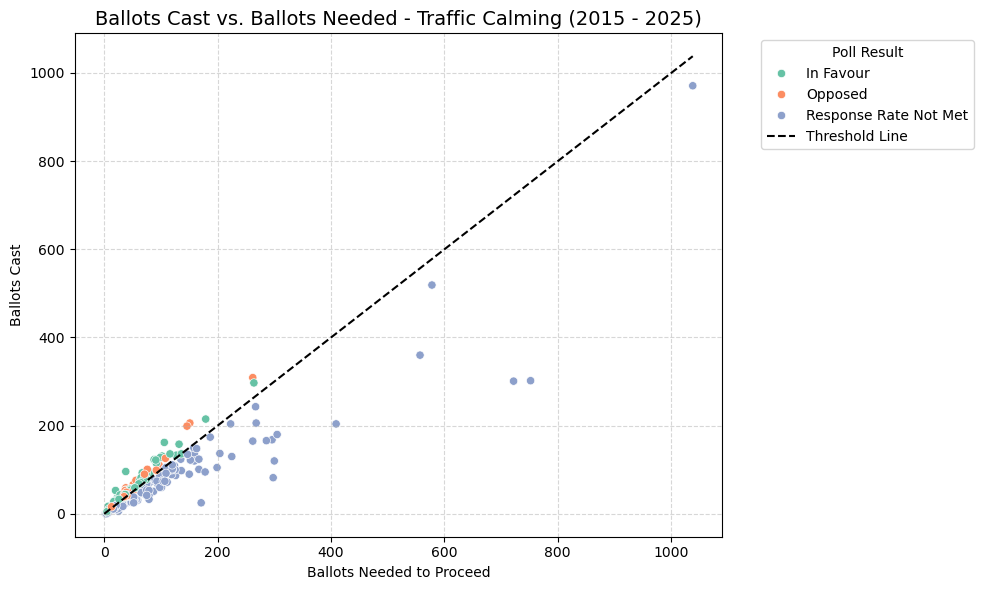

In [6]:
# Visualization: Scatter plot of BALLOTS_CAST vs BALLOTS_NEEDED_TO_PROCEED
# Provides a visual representation of voter engagement

# Set the application type to visualize
application_type = "Traffic Calming"
df_to_visualize = df_col_reordered[df_col_reordered['APPLICATION_FOR'] == application_type]

# Construct the visualization
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(
    data=df_to_visualize,
    x='BALLOTS_NEEDED_TO_PROCEED',  # x-axis: ballots needed to proceed
    y='BALLOTS_CAST',               # y-axis: ballots cast
    hue='POLL_RESULT',              # color by poll result
    palette="Set2",
    #size='BALLOTS_DISTRIBUTED',
    #sizes=(20, 200)
)

# Add reference line where ballots cast = ballots needed
max_val = max(df_to_visualize['BALLOTS_NEEDED_TO_PROCEED'].max(), df_to_visualize['BALLOTS_CAST'].max())
ax.plot([0, max_val], [0, max_val], 'k--', label='Threshold Line')

# Styling
ax.set_title(f"Ballots Cast vs. Ballots Needed - {application_type} (2015 - 2025)", fontsize=14)
ax.set_xlabel("Ballots Needed to Proceed")
ax.set_ylabel("Ballots Cast")
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title="Poll Result", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save figure to disk
fig.savefig("viz_01_ballots_cast_vs_needed_with_python.png", dpi=300, bbox_inches='tight')
plt.show()


#### Filter out years with partial data, 2015 and 2025

In [7]:
# Remove polls with OPEN_DATE and CLOSE_DATE in 2015 and 2025 (as they are not full years in the dataset)
df_2016_2024 = df_col_reordered[
    (df_col_reordered['OPEN_DATE'].dt.year != 2015) &
    (df_col_reordered['CLOSE_DATE'].dt.year != 2015) &
    (df_col_reordered['OPEN_DATE'].dt.year != 2025) &
    (df_col_reordered['CLOSE_DATE'].dt.year != 2025)
]

df_2016_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 129 to 1296
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   _id                            1164 non-null   int64         
 1   POLL_ID                        1164 non-null   int64         
 2   POLL_CD                        1164 non-null   object        
 3   APPLICATION_FOR                1164 non-null   category      
 4   ADDRESS                        777 non-null    object        
 5   OPEN_DATE                      1164 non-null   datetime64[ns]
 6   CLOSE_DATE                     1164 non-null   datetime64[ns]
 7   POTENTIAL_VOTERS               1164 non-null   int64         
 8   DECLARATIONS_ADDED             1164 non-null   int64         
 9   FINAL_VOTER_COUNT              1164 non-null   int64         
 10  BALLOTS_DISTRIBUTED            1164 non-null   int64         
 11  BALLOTS_RETURNED_TO_

In [8]:
# For each application type, display the number of polls conducted each year from 2016 to 2024
df_polls_by_year = df_2016_2024.groupby(['APPLICATION_FOR', df_2016_2024['OPEN_DATE'].dt.year])['POLL_ID'].count().unstack()
df_polls_by_year

C:\Users\bisha\AppData\Local\Temp\ipykernel_17948\936849118.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_polls_by_year = df_2016_2024.groupby(['APPLICATION_FOR', df_2016_2024['OPEN_DATE'].dt.year])['POLL_ID'].count().unstack()


OPEN_DATE,2016,2017,2018,2019,2020,2021,2022,2023,2024
APPLICATION_FOR,,,,,,,,,
Appeal - Front Yard Parking,83,44,32,0,1,0,0,0,0
Boulevard Cafe,28,27,18,22,0,0,0,0,0
Business Improvement Area,0,1,1,1,2,0,0,0,2
Commercial Boulevard Parking,4,0,2,3,0,2,1,0,0
Front Yard Parking,72,63,71,48,27,67,53,76,33
Permit Parking,10,13,11,20,11,13,16,8,6
Permit Parking Removal,0,0,0,0,17,16,0,0,0
Proposed Business Improvement Area,1,1,1,0,2,1,0,0,0
Traffic Calming,31,53,36,32,13,8,12,12,18


#### Prepare data for Google Sheets visualization

In [9]:
# Create a wide-format dataframe for use in Google Sheets grouped bar chart
# showing poll results by year for a given application type

# Create a separate dataframe for polls of selected application type
application_type = 'Traffic Calming'

df_for_app = df_2016_2024[
    df_2016_2024['APPLICATION_FOR'] == application_type
].copy()
df_for_app['YEAR'] = df_for_app['OPEN_DATE'].dt.year

# Group by year and poll result and count
agg_data = (
    df_for_app
    .groupby(['YEAR', 'POLL_RESULT'], observed=False)
    .size()
    .reset_index(name='COUNT')
)

df_wide = agg_data.pivot(
    index='YEAR',
    columns='POLL_RESULT',
    values='COUNT'
).fillna(0)

# Optional: sort columns for consistent order
df_wide = df_wide[['In Favour','Opposed','Response Rate Not Met']]

# Reset index to have YEAR as a column
df_wide = df_wide.reset_index()

# Save to CSV for import into Excel or Google Sheets
df_wide.to_csv("./excel_gsheets/poll_results_by_year_data_exported.csv", index=False)

print(df_wide)

POLL_RESULT  YEAR  In Favour  Opposed  Response Rate Not Met
0            2016          8        6                     17
1            2017         15       10                     28
2            2018         14        3                     19
3            2019         12        6                     14
4            2020          4        1                      8
5            2021          1        0                      7
6            2022          6        1                      5
7            2023          3        1                      8
8            2024          7        4                      7
